# X1 Segmentation

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import h5py as h5
import torch as th

## Let's load the data and display some examples


In [24]:
file_path = '/mnt/data/datascience_miniprojects/01_segmentation/image_datasets/Au_np_with_varying_substrate/images/'

print("Folders in file_path:")
folders = [f for f in os.listdir(file_path) if os.path.isdir(os.path.join(file_path, f))]
for folder in folders[:5]:
    print(f"- {folder}")

Folders in file_path:
- image_batch_45583848663_20240606
- image_batch_46278748687_20240606
- image_batch_45469557772_20240606
- image_batch_45641514575_20240606
- image_batch_45349807339_20240606


## Get all .h5 files from all subfolders

In [27]:

h5_files = []
for folder in folders:
    folder_path = os.path.join(file_path, folder)
    files = [f for f in os.listdir(folder_path) if f.endswith('.h5')]
    h5_files.extend([os.path.join(folder_path, f) for f in files])

print(f"\nFound {len(h5_files)} .h5 files:")
for f in h5_files[:5]:  # Print first 5 files as example
    print(f"- {f}")
if len(h5_files) > 5:
    print("...")


Found 176 .h5 files:
- /mnt/data/datascience_miniprojects/01_segmentation/image_datasets/Au_np_with_varying_substrate/images/image_batch_45583848663_20240606/image_batch.h5
- /mnt/data/datascience_miniprojects/01_segmentation/image_datasets/Au_np_with_varying_substrate/images/image_batch_46278748687_20240606/image_batch.h5
- /mnt/data/datascience_miniprojects/01_segmentation/image_datasets/Au_np_with_varying_substrate/images/image_batch_45469557772_20240606/image_batch.h5
- /mnt/data/datascience_miniprojects/01_segmentation/image_datasets/Au_np_with_varying_substrate/images/image_batch_45641514575_20240606/image_batch.h5
- /mnt/data/datascience_miniprojects/01_segmentation/image_datasets/Au_np_with_varying_substrate/images/image_batch_45349807339_20240606/image_batch.h5
...


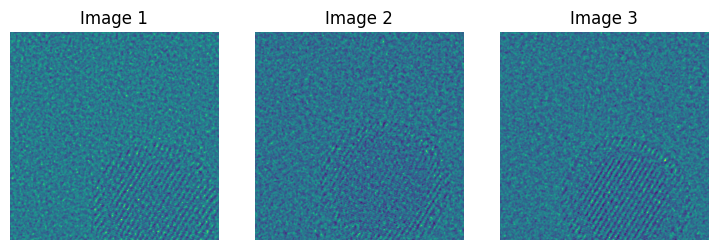

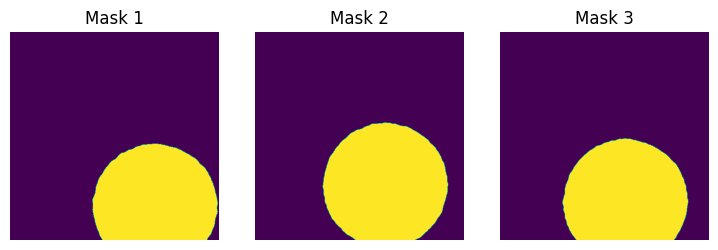

In [28]:
file_names = h5_files[0]

with h5.File(file_names, 'r') as f:
    d = f['train_batch'][...]
    m = f['mask_batch'][...]
   

fig, axes = plt.subplots(1, 3, figsize=(15/2, 5/2))
for i in range(3):
    axes[i].imshow(d[i])
    axes[i].axis('off')
    axes[i].set_title(f'Image {i+1}')
plt.tight_layout()
plt.show()
# Plot first 3 masks
fig, axes = plt.subplots(1, 3, figsize=(15/2, 5/2))
for i in range(3):
    axes[i].imshow(m[i])
    axes[i].axis('off') 
    axes[i].set_title(f'Mask {i+1}')
plt.tight_layout()
plt.show()

# %%